In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


the data has 571 rows and 43 columns. CGPA is the label and Seat No. is a non useful feature.

In [3]:
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [4]:
df.tail(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
561,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,...,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
562,CS-97563,B,B,A,C,B,B+,B,C-,B+,...,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
563,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,...,B+,C,B+,C-,C-,C,F,D,C,2.612
564,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,...,B,C+,B+,D+,C,C-,B,C,B-,2.607
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [5]:
df.shape

(571, 43)

In [6]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

We can see the features are all object type data and we will using encoding methods to solve them.

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

As we can see the data has many null values and the data is categorical we will replace null by mode values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [9]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


We will seperate numerical and categorical column

In [10]:
cat_col = []
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        cat_col.append(i)
    else:
        num_col.append(i)
print("categorical column = ",cat_col)
print("numerical column = ", num_col)

categorical column =  ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
numerical column =  ['CGPA']


we will drop seat no as it does not give info to the model

In [11]:
df.drop('Seat No.', axis = 1, inplace = True)

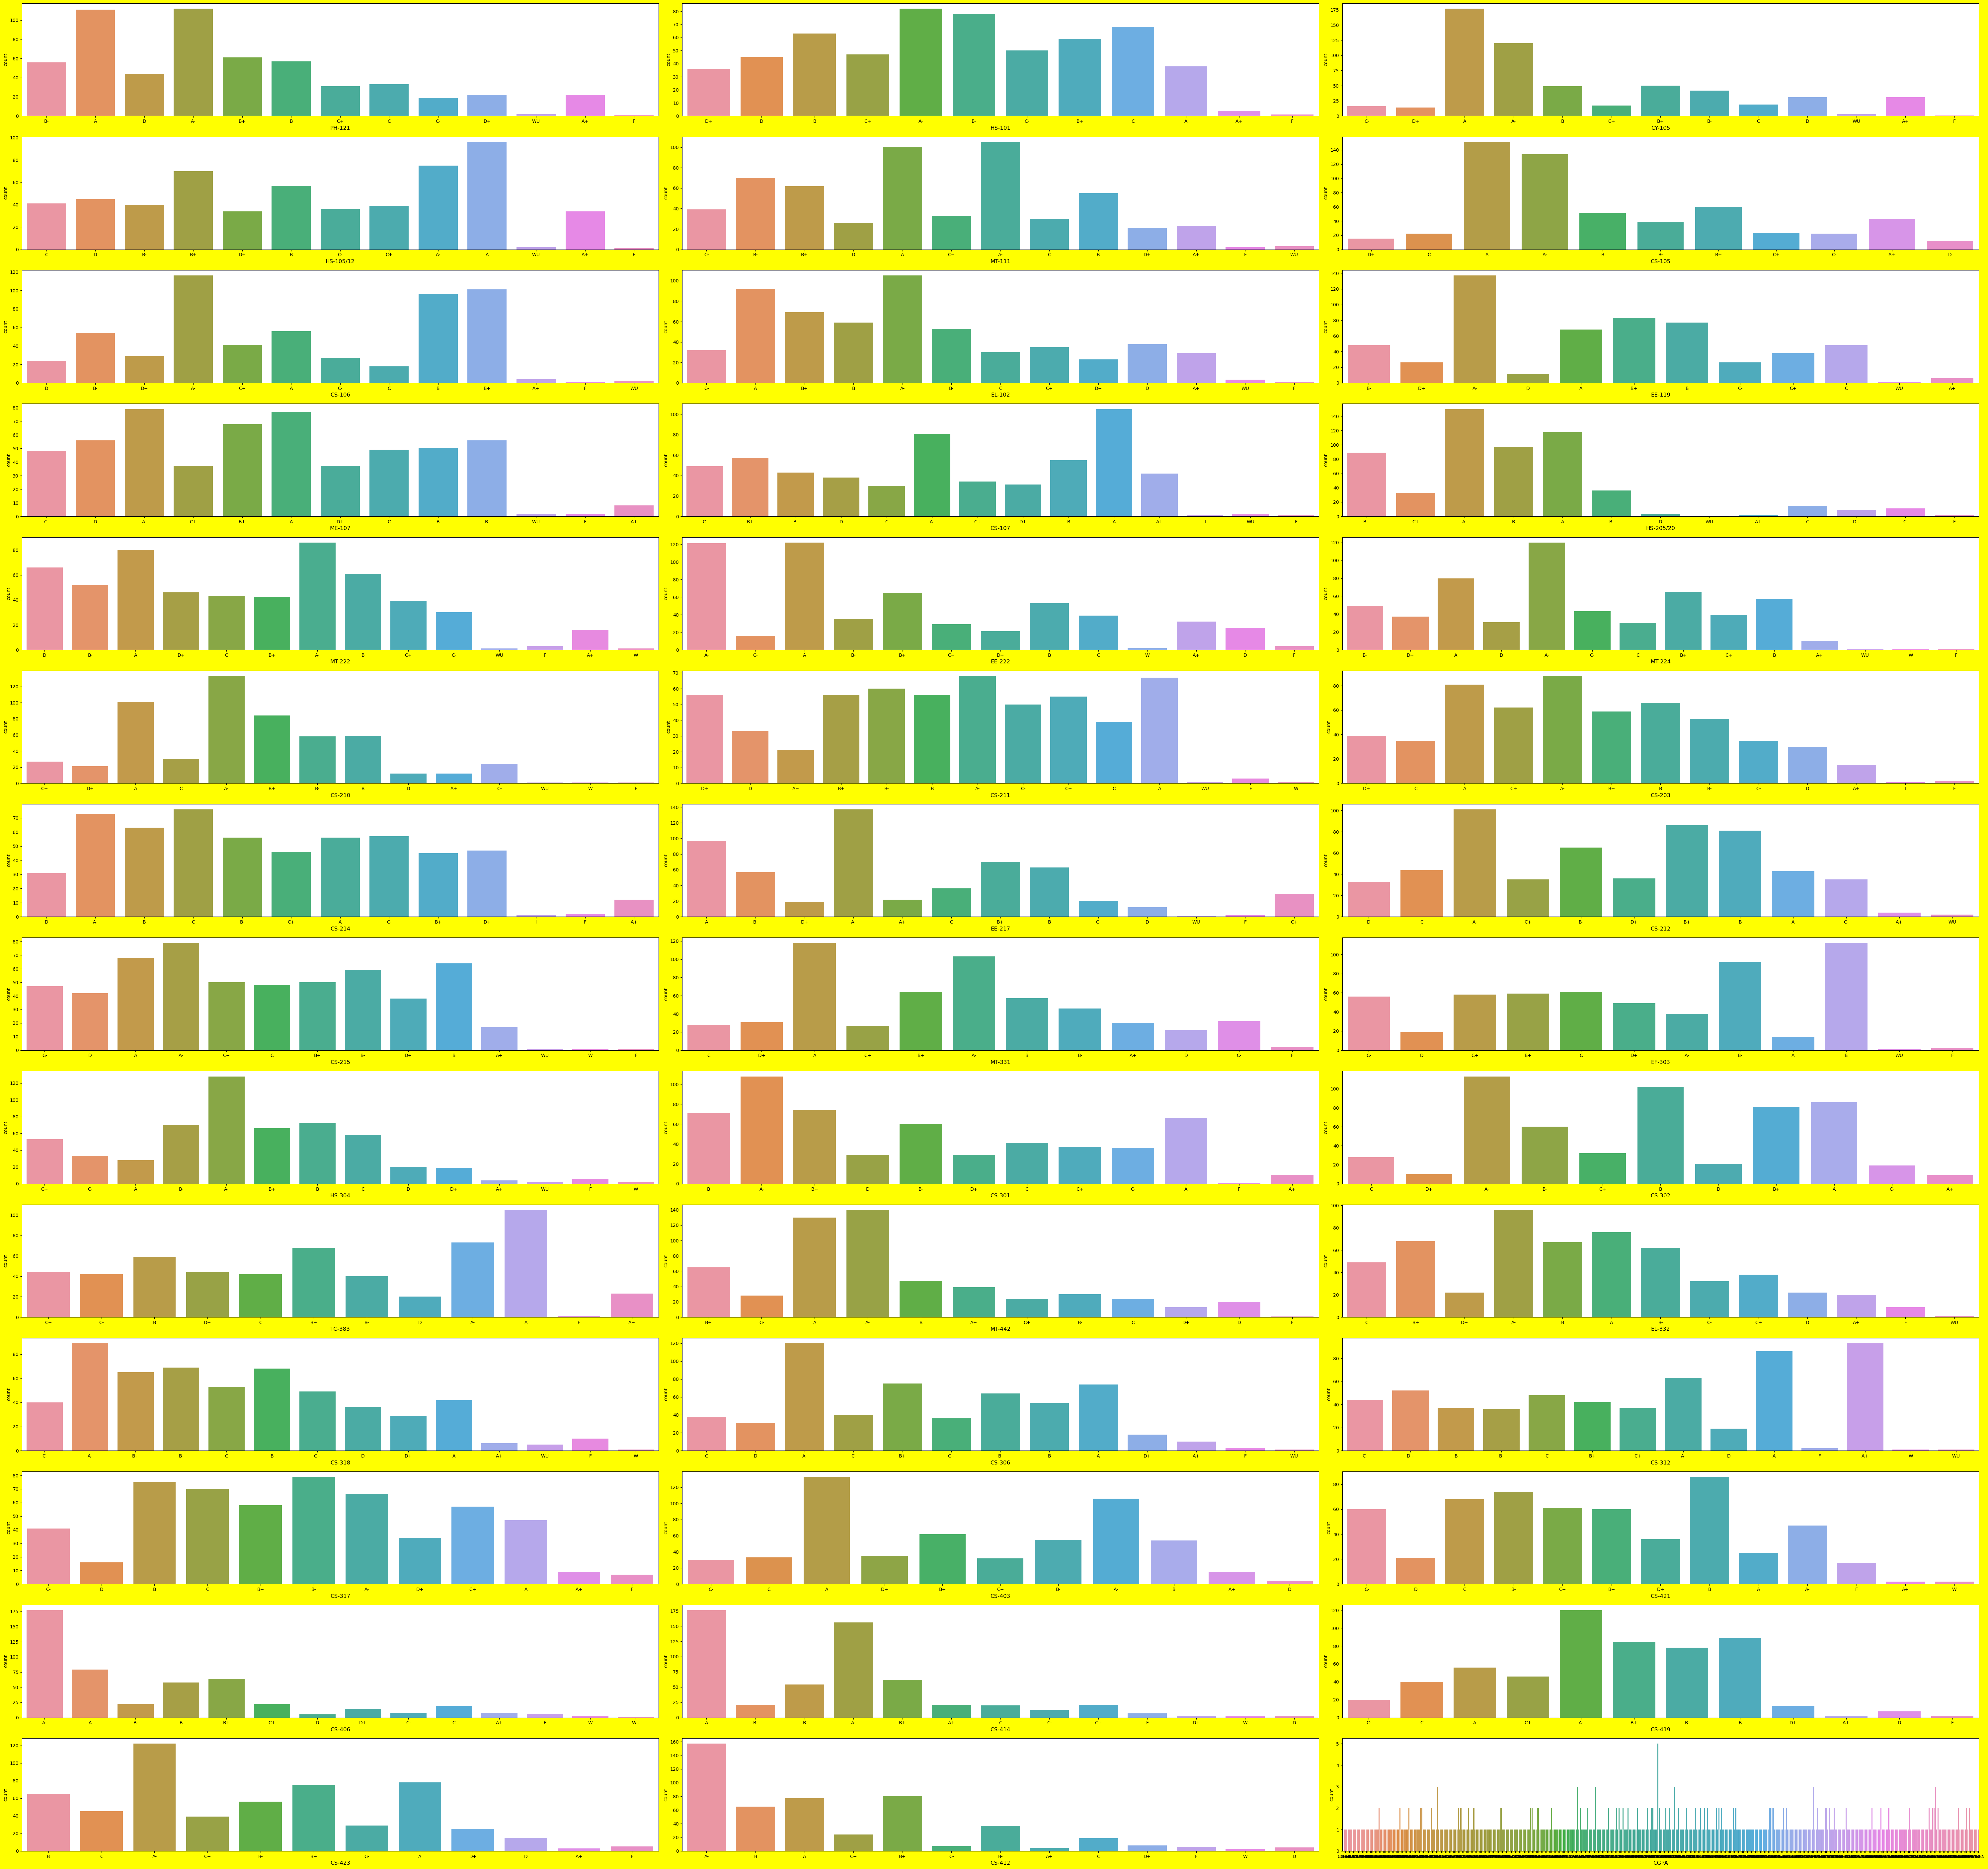

In [12]:
plt.figure(figsize=(60,60),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 45:
        ax = plt.subplot(15,3,plotnumber)
        sns.countplot(x=column,data = df)
        plt.xlabel(column,fontsize =12)
    plotnumber+=1
plt.tight_layout()

In [13]:
for i in df:
    df[i].fillna(df[i].mode()[0],inplace = True)
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


<Axes: >

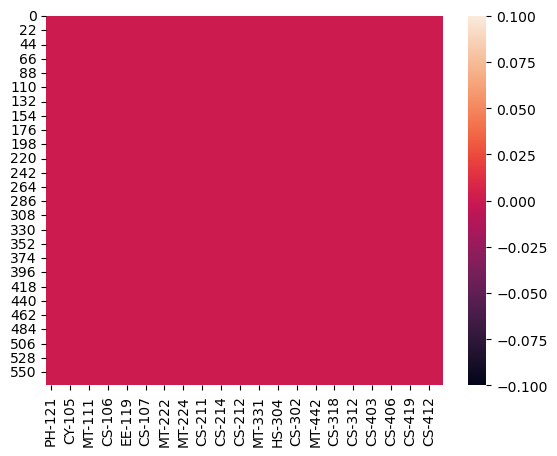

In [14]:
sns.heatmap(df.isnull())

In [15]:
dfd = df.drop('CGPA',axis = 1)

In [16]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
i = 1
for column in dfd:
    df[i] = lab_enc.fit_transform(df[column])
    df[column] = df[i]
    i+=1
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,32,33,34,35,36,37,38,39,40,41
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


In [17]:
df = df[df.columns[:42]]
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


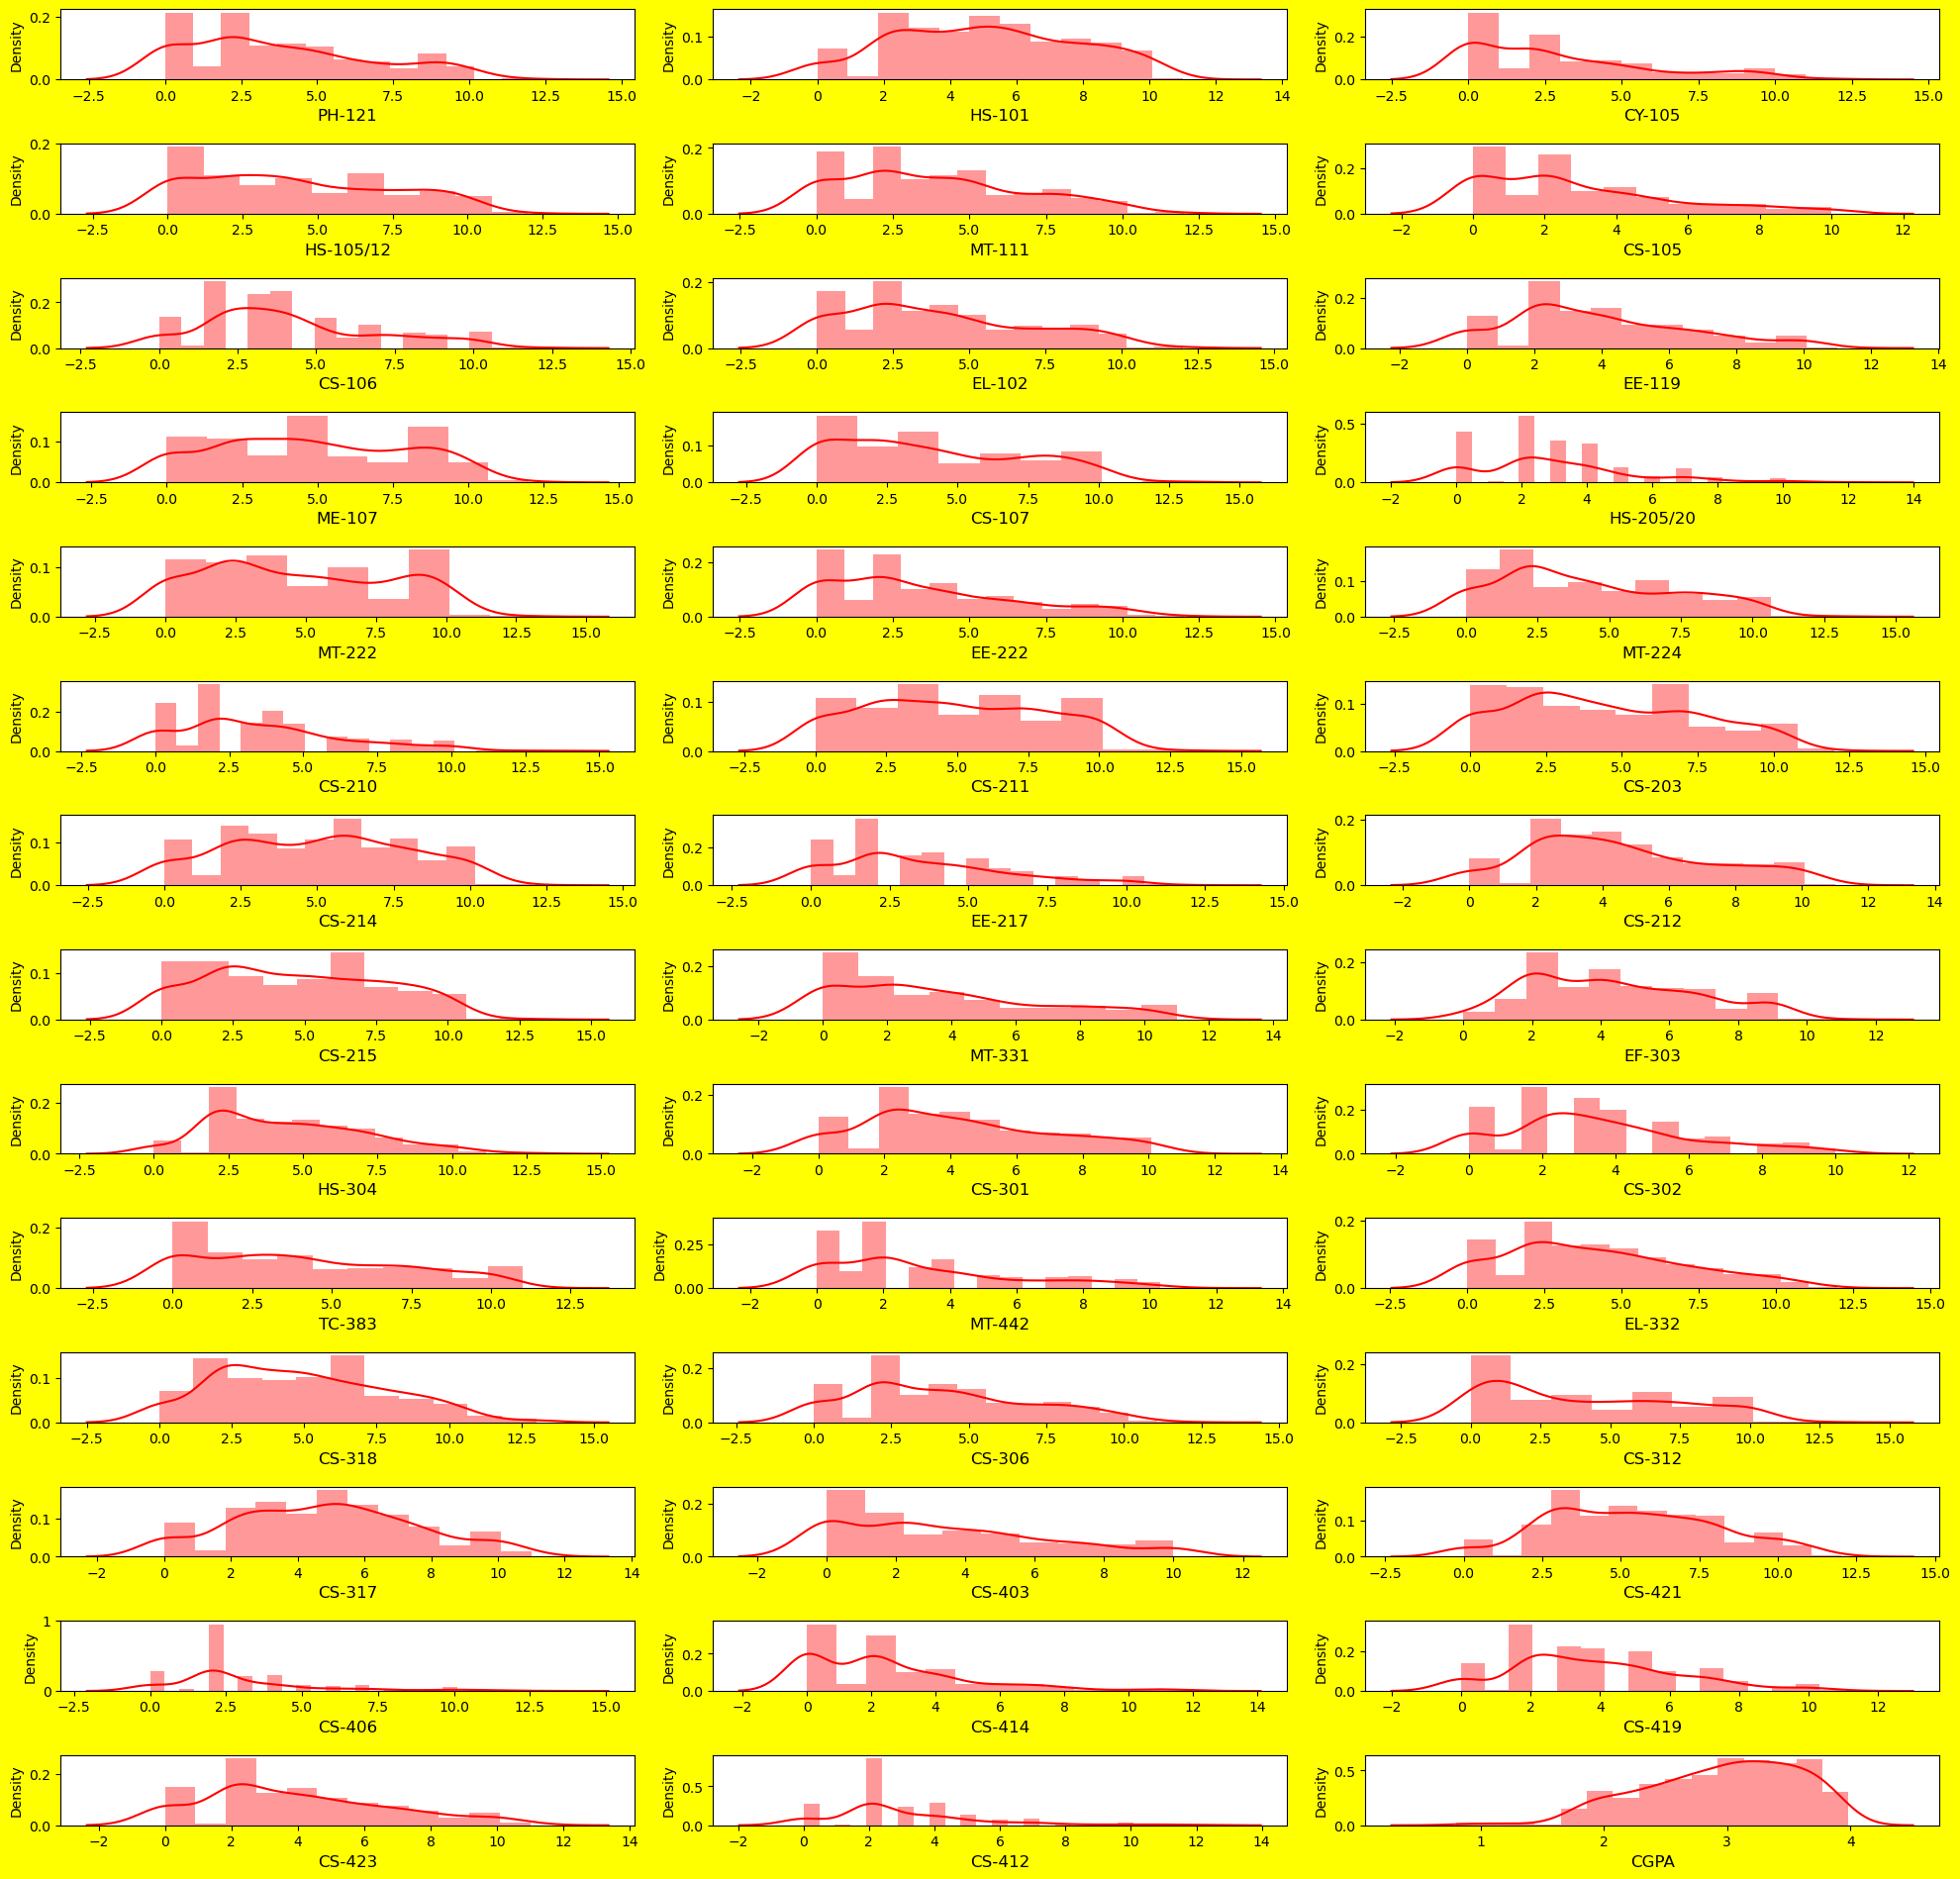

In [18]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 43:
        ax = plt.subplot(15,3,plotnumber)
        sns.distplot(df[column],color = "r")
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

We can see all features have normal distribution and not much outliers in any data.

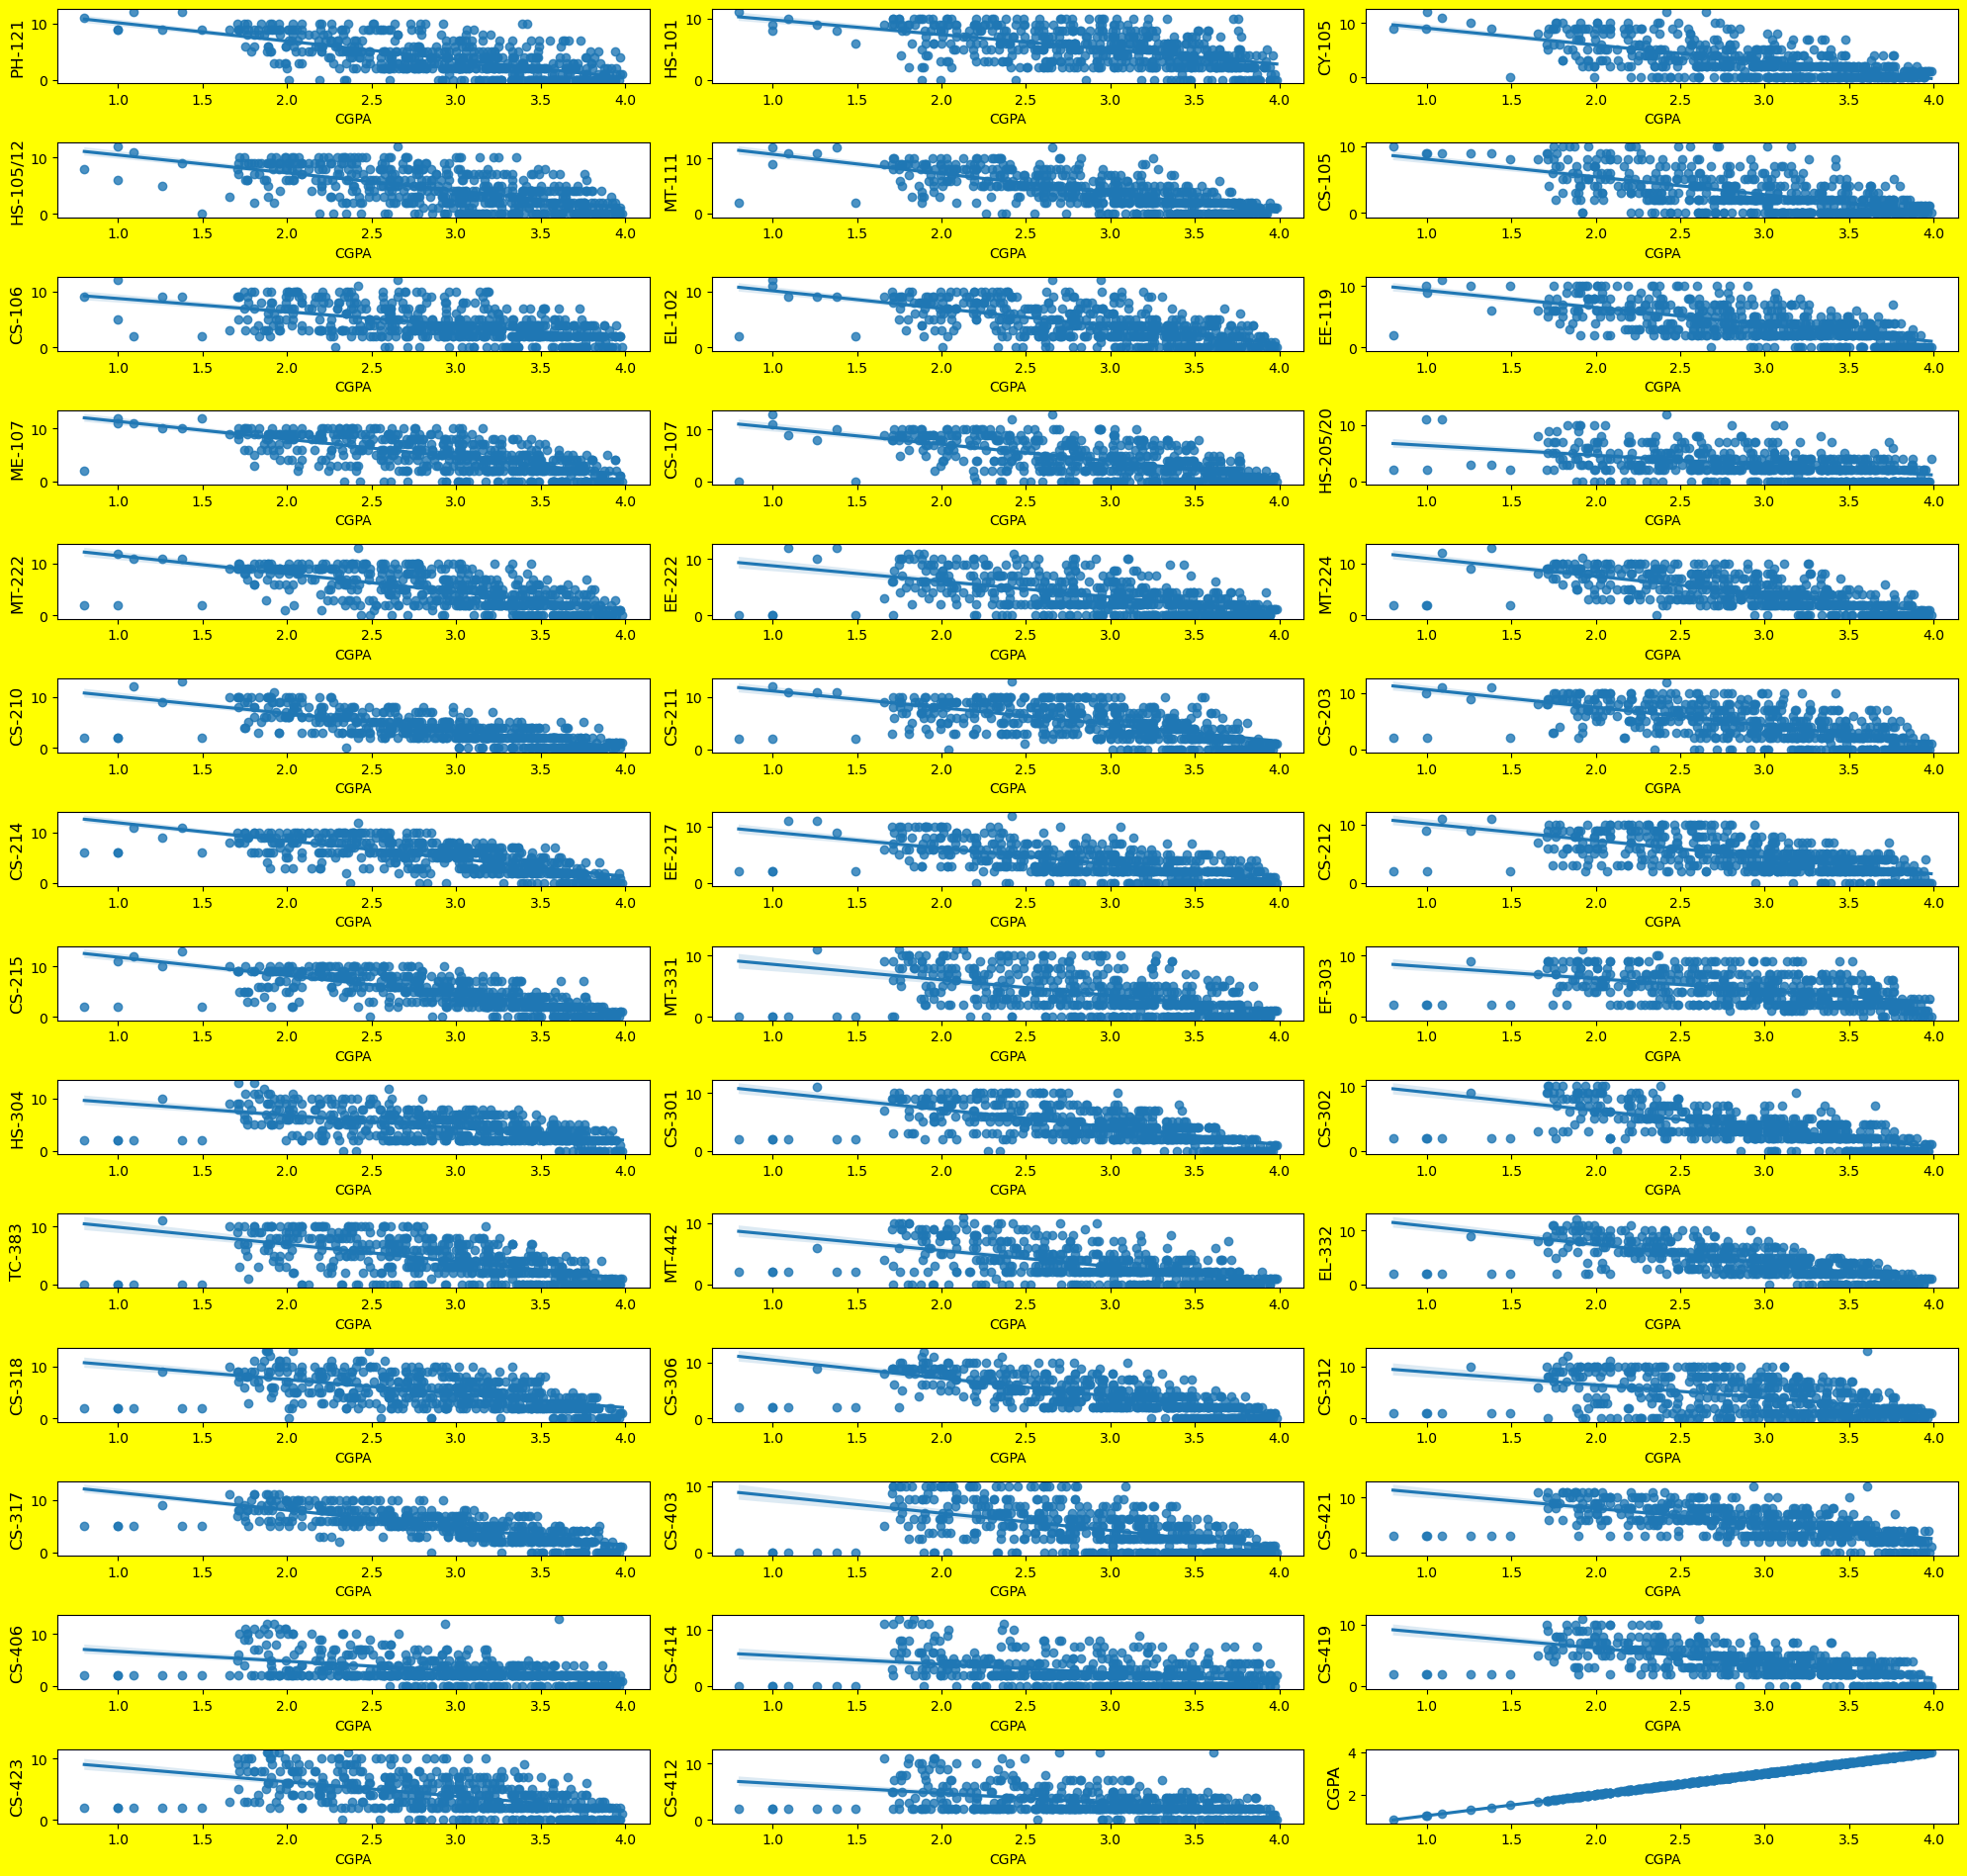

In [19]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 43:
        ax = plt.subplot(15,3,plotnumber)
        sns.regplot(y = df[column],x = 'CGPA', data = df)
        plt.ylabel(column, fontsize = 12)
        plt.xlabel('CGPA')
    plotnumber+=1
plt.tight_layout()

We can see all the features has inverse relation with cgpa according to the reg line.

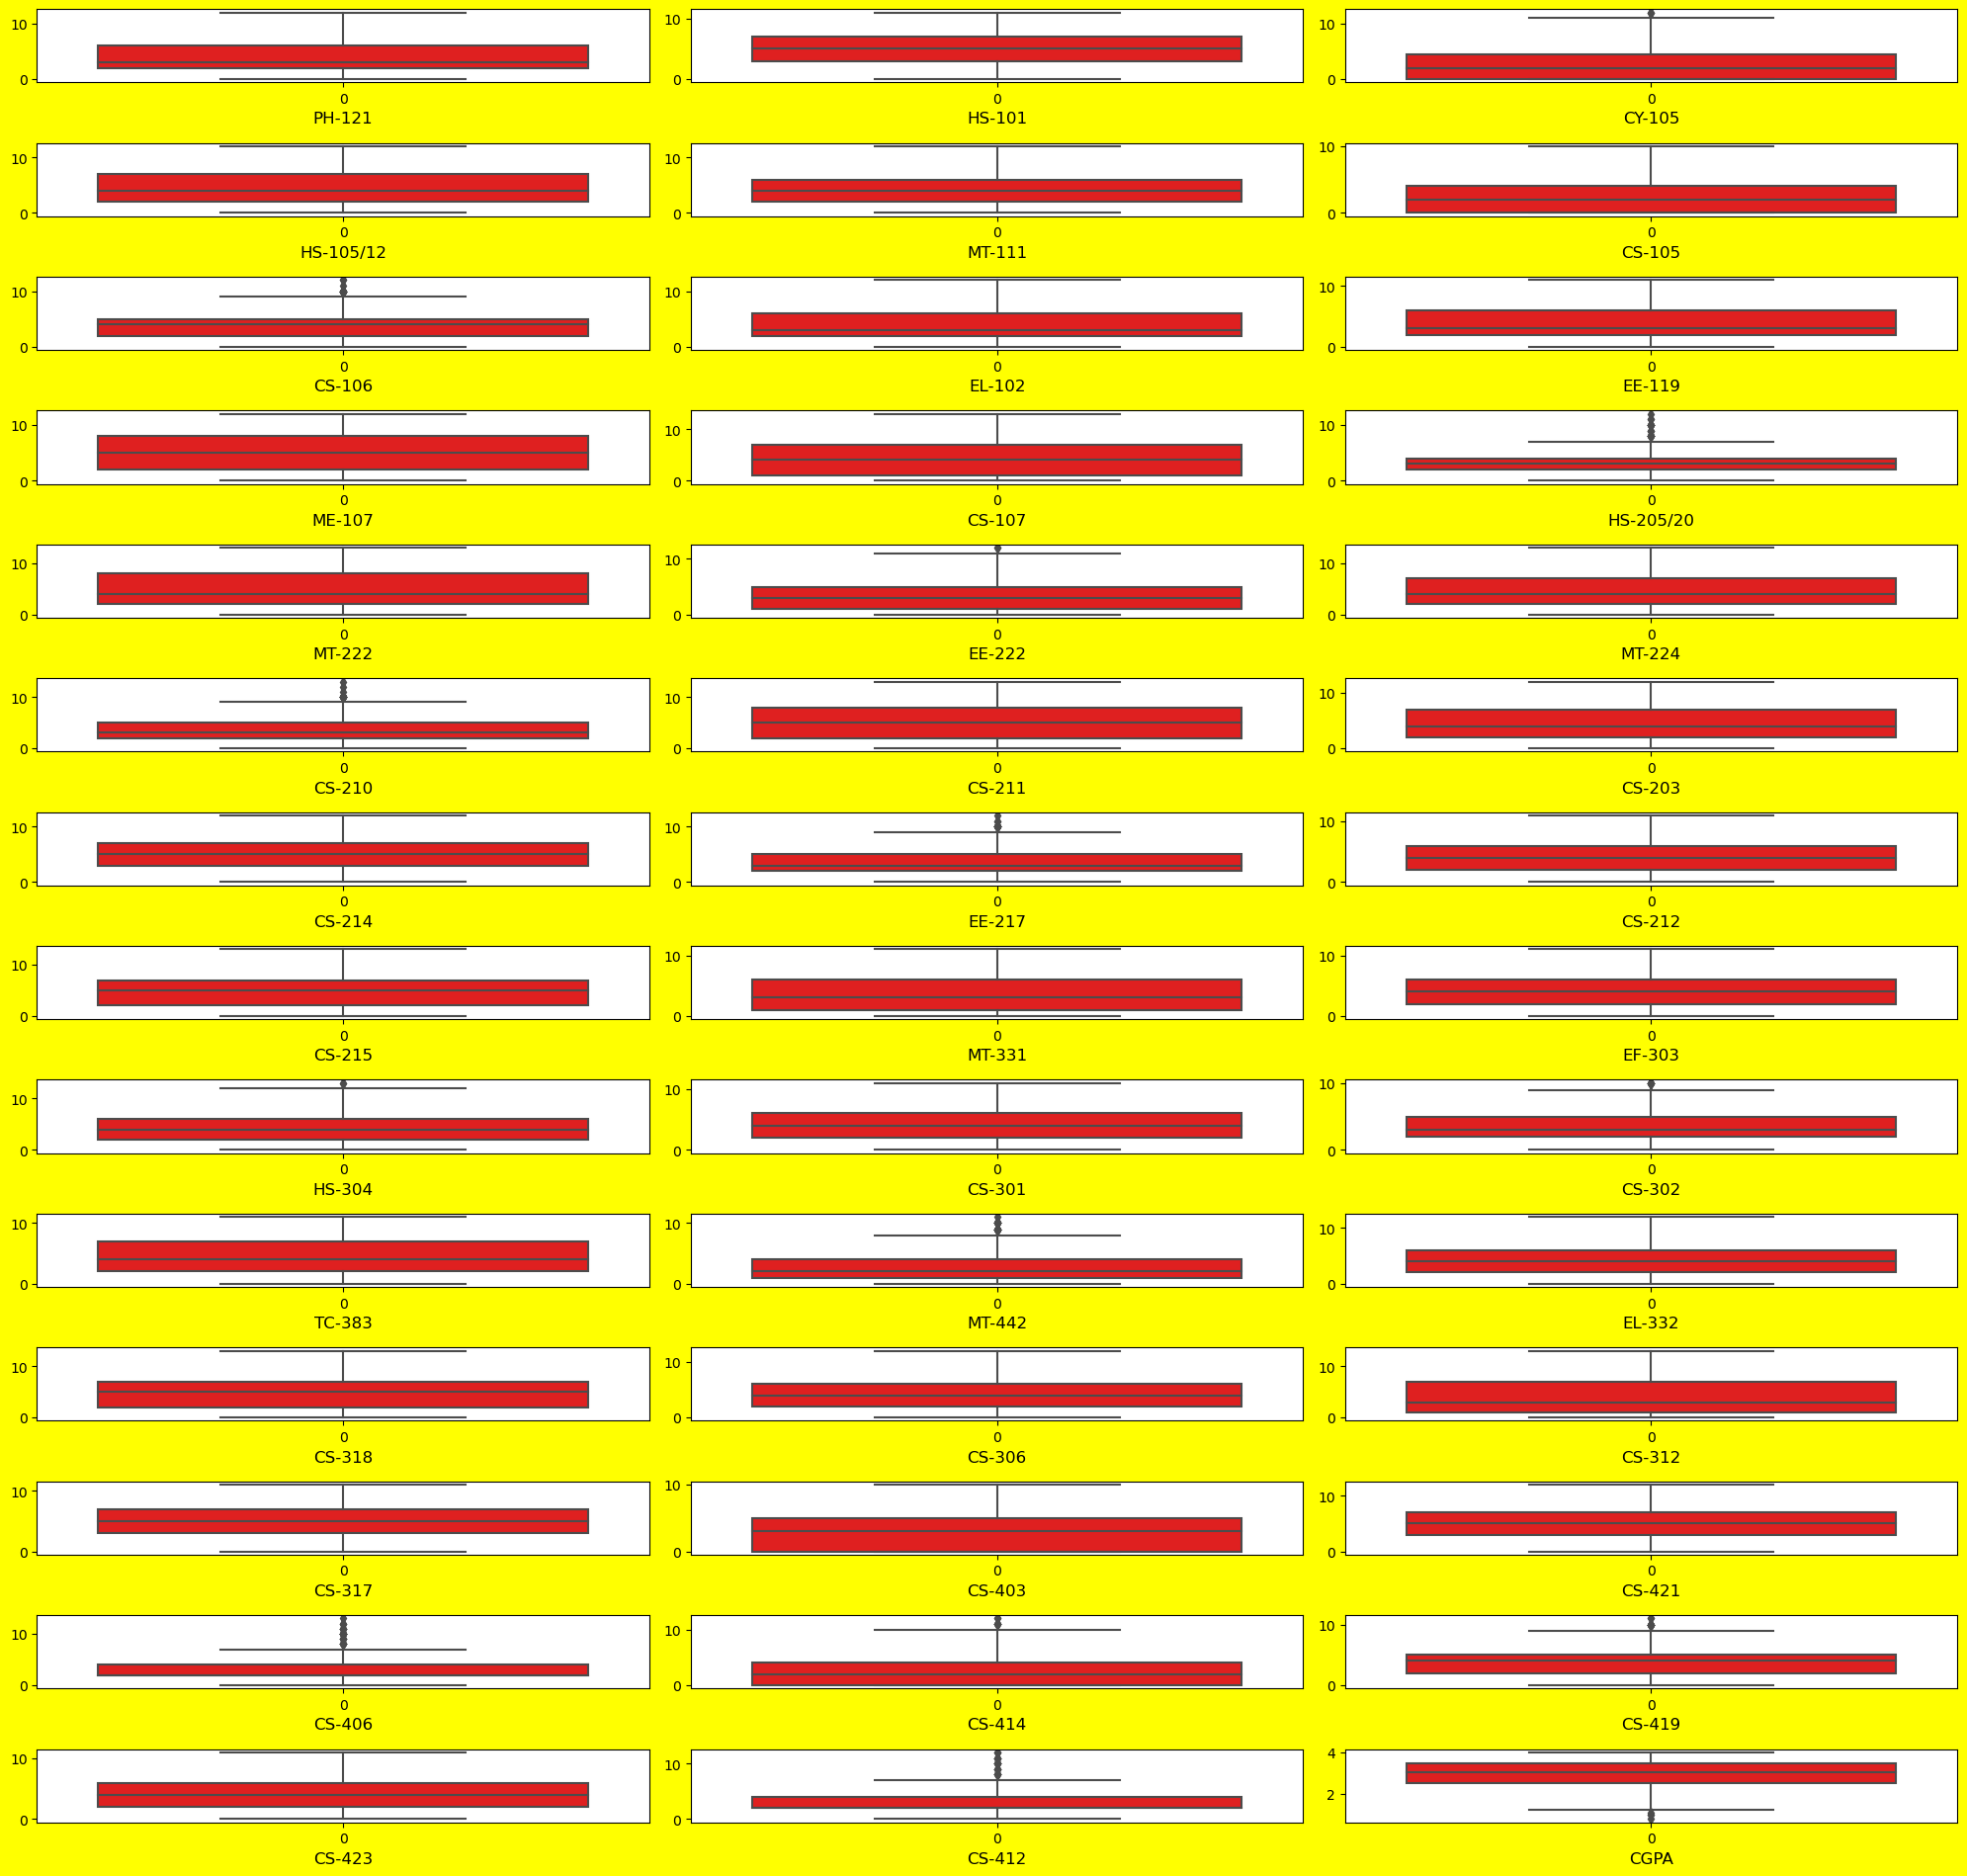

In [20]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 45:
        ax = plt.subplot(15,3,plotnumber)
        sns.boxplot(df[column],color = "r")
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

there are some outliers in CS-106,HS 205/20,CS-210,EE-217,MT-442CS-406,CS-414,CS-419,CS-412. But they are less. So we will keep the outliers for the model to learn.

In [21]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

there is not much skewness in the data

In [22]:
corr = df.corr()
corr

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.663023


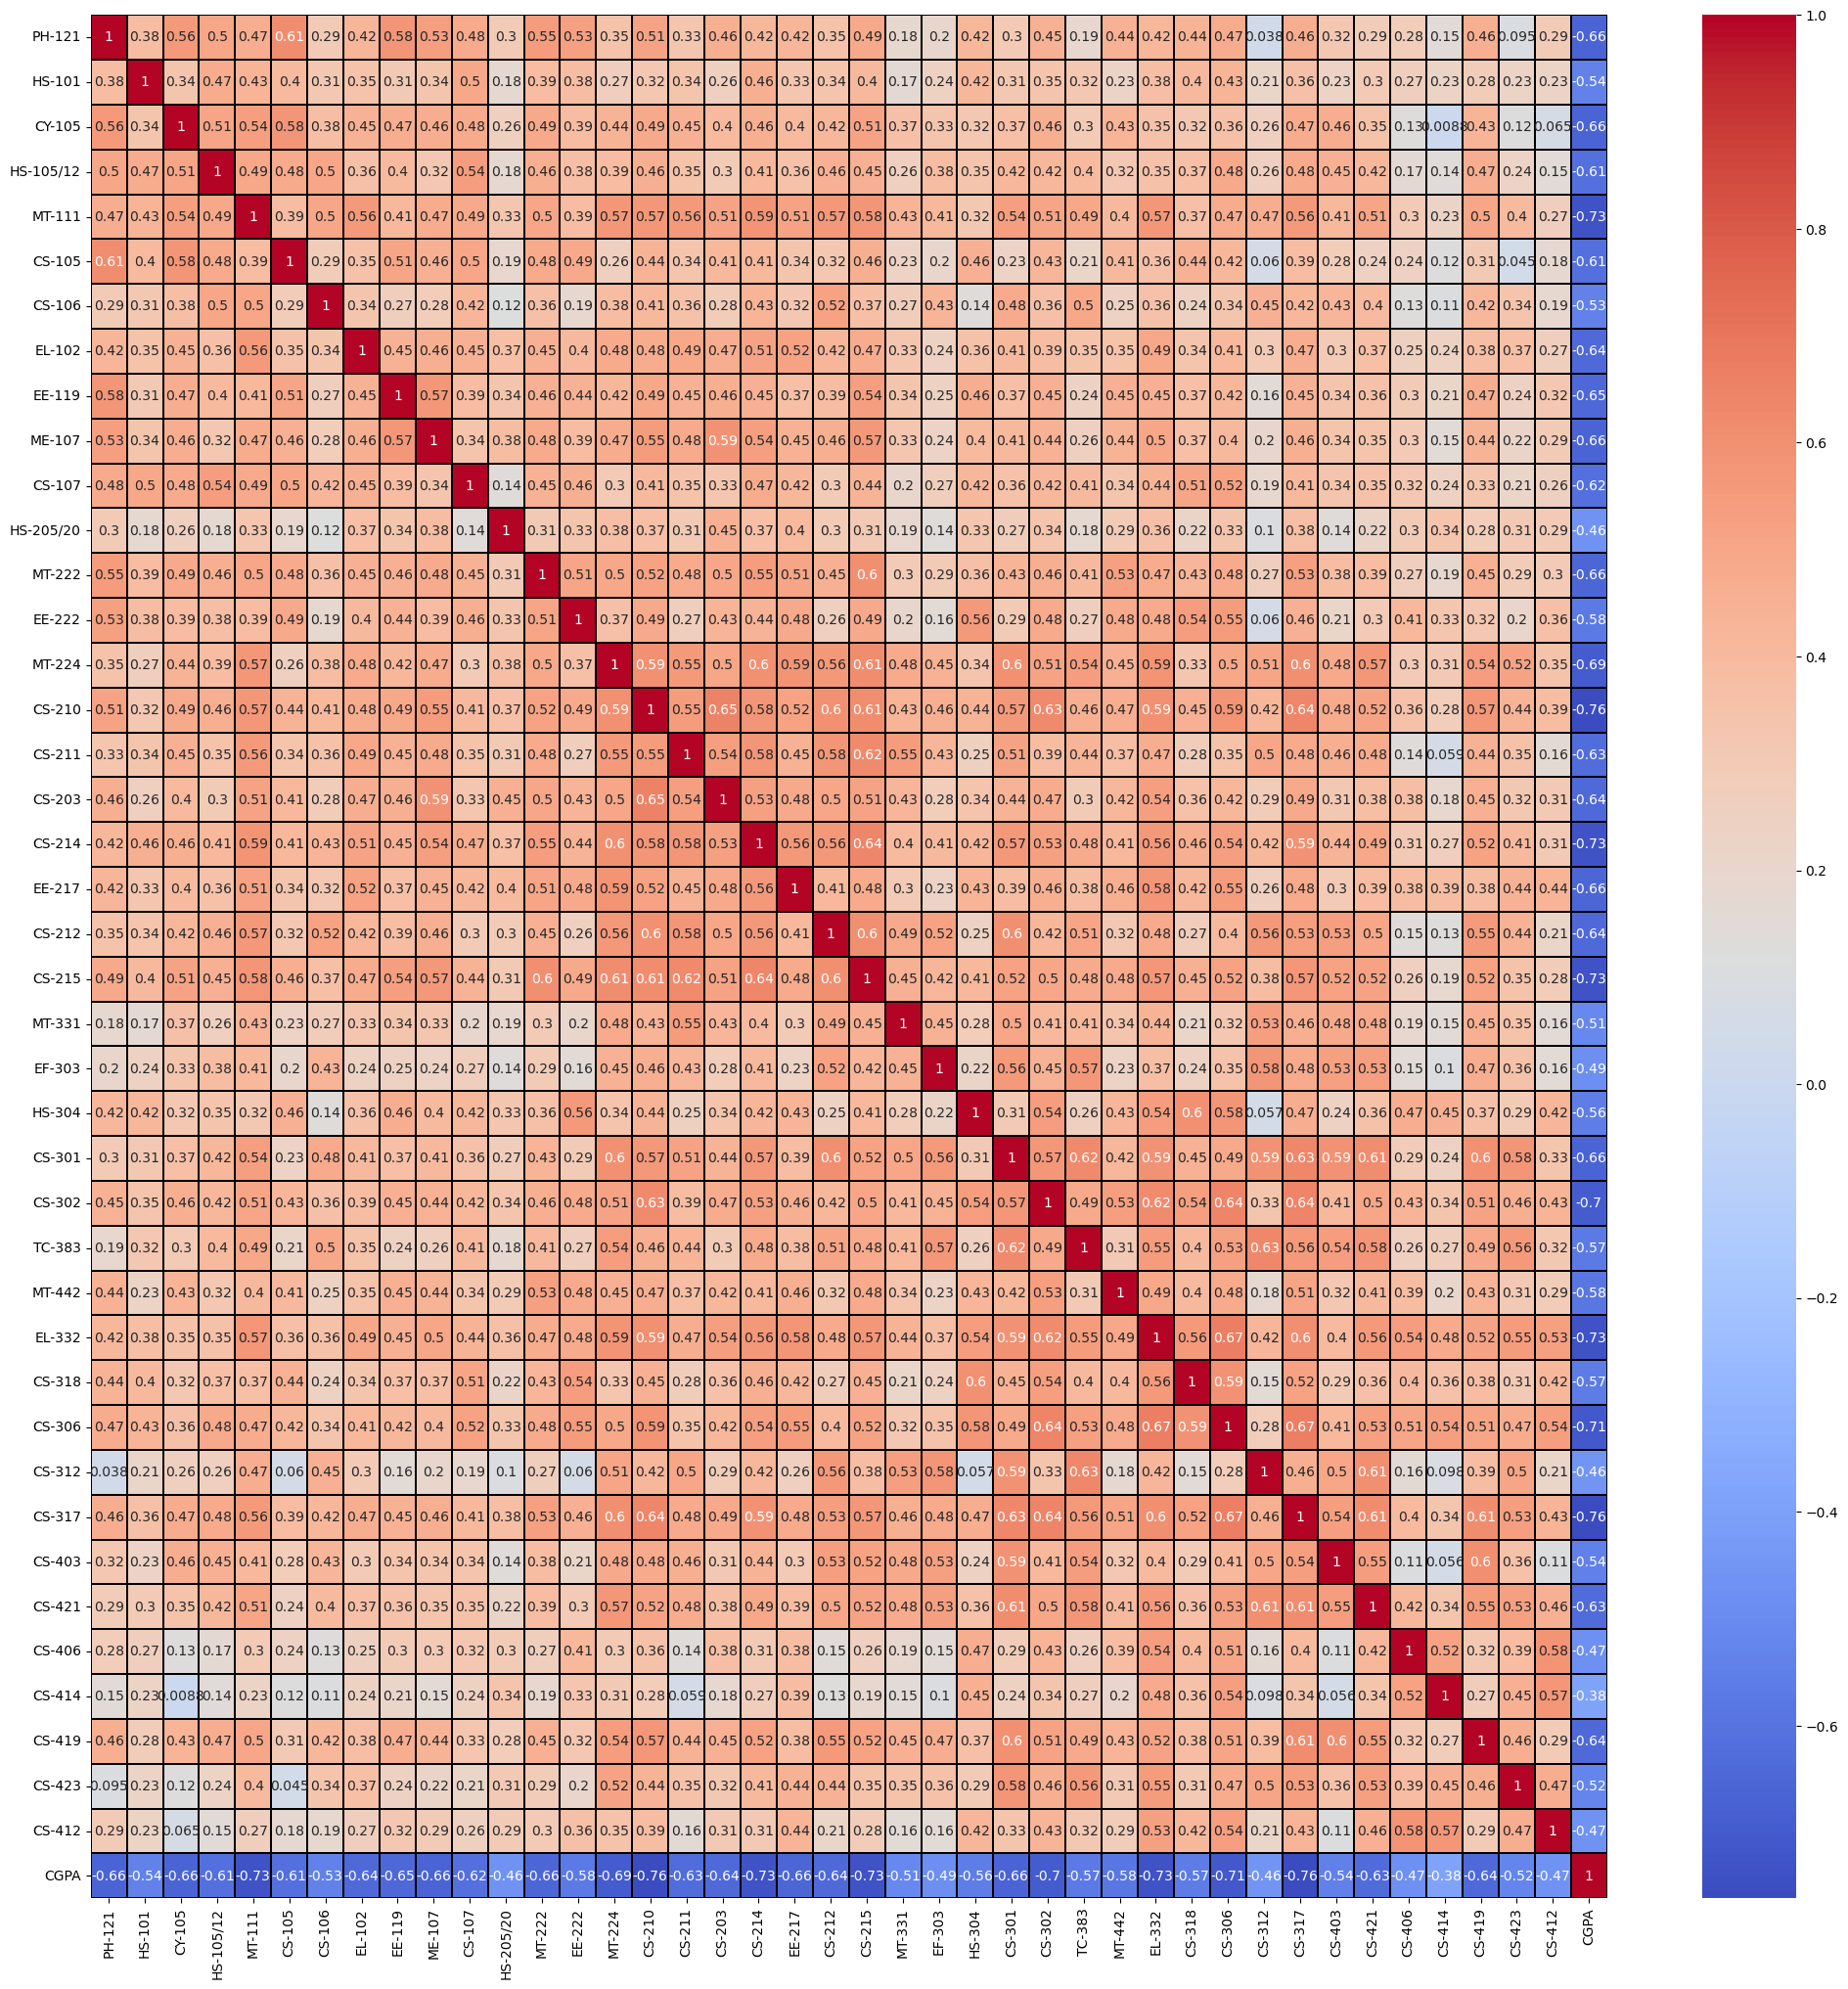

In [23]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),linewidth = 0.1,fmt = ".2g",annot = True,cmap = "coolwarm",linecolor = 'black')
plt.yticks(rotation = 0)
plt.show()

the features are not much correlated and hence decide using vif

In [24]:
x = df.drop('CGPA', axis = 1)
y = df['CGPA']

Let us standardize the data.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,-0.399094,-0.960095,1.740513,-0.346121,-0.450178
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,-0.399094,1.042149,0.900418,0.727983,-0.021043
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-1.210063,-0.960095,-1.619869,-0.704156,-1.308446
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.399094,-0.960095,-0.779774,-0.704156,-1.308446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-1.210063,0.641700,0.060322,-0.346121,-1.308446
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,-0.399094,0.241251,-0.779774,0.727983,-0.450178
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-1.210063,1.442597,0.060322,-0.704156,-0.450178
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,2.439300,1.442597,-0.359726,0.369948,1.266360


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["features"] = x.columns
vif

,VIF values,features
0,2.827608,PH-121
1,1.771294,HS-101
2,2.514966,CY-105
3,2.293035,HS-105/12
4,2.638921,MT-111
5,2.366597,CS-105
6,1.927701,CS-106
7,1.968027,EL-102
8,2.190768,EE-119
9,2.294552,ME-107


Vif confirms the values are not related
Let us go for model building 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [28]:
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ",maxAccu , " at random state ", maxRs )

Best accuracy is  0.9687445129503746  at random state  72


We can see the model did well in accuracy for the random state 72
let us split the data for that random state

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = maxRs)

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [31]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
knn = KNN()
svr = SVR()

In [32]:
models = {'Linear Regression':lr,'Lasso':lasso,'Ridge':ridge,'Random Forest Regressor':rfr,'Extra tree regressor':etr,'Decision tree regressor':dtr,'KNN':knn,'SVR':svr}
for name, model in models.items():
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred_train = model.predict(x_train)
    print("following is the score of ",name)
    print("R2 score : ",r2_score(y_test,pred)*100)
    #print("R2 score on training data : ",r2_score(y_test,pred_train)*100)
    print("Mean absolute error : ",mean_absolute_error(y_test,pred))
    print("Mean squared error  : ",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
    score = cross_val_score(model,x,y,)
    print(score)
    print(score.mean())
    #sc_mean = score.mean()
    print("difference between r2 score and cross val score : ", r2_score(y_test,pred)-score.mean())
    print("\n\n")

following is the score of  Linear Regression
R2 score :  96.87445129503746
Mean absolute error :  0.08446318730509095
Mean squared error  :  0.012406125791165897
Root mean squared error : 0.1113827894747025
[0.8927601  0.93427094 0.90082619 0.94061762 0.84878197]
0.9034513625626615
difference between r2 score and cross val score :  0.0652931503877131



following is the score of  Lasso
R2 score :  -0.0070241302147833196
Mean absolute error :  0.5415601921443043
Mean squared error  :  0.39695421139645143
Root mean squared error : 0.6300430234487574
[-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396]
-0.008083520623131602
difference between r2 score and cross val score :  0.008013279320983769



following is the score of  Ridge
R2 score :  96.8904825682866
Mean absolute error :  0.08426716206121146
Mean squared error  :  0.0123424934464817
Root mean squared error : 0.11109677513988289
[0.89292168 0.93429658 0.90102969 0.94099039 0.84890717]
0.9036291005426633
difference between

We can see SVR has performed the best with a good cross val score as well. So SVR will be selected for hyper parameter tuning.

In [33]:
from sklearn.model_selection import RandomizedSearchCV
param = {
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'gamma' : ['scale','auto'],
}

svr_cv = RandomizedSearchCV(estimator = svr , param_distributions = param ,cv = 5, n_jobs = -1)
svr_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [34]:
best_param = svr_cv.best_params_
print(best_param)

{'kernel': 'linear', 'gamma': 'scale'}


th best param is when kernel is linear and gamma is scale

In [35]:
model = SVR(kernel = 'linear', gamma = 'scale')
model.fit(x_train,y_train)
pred = model.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)
score = cross_val_score(model,x,y)
print(score)
print(score.mean())
print("difference between r2 score and cross val score : ", r2_score(y_test,pred)-score.mean())

98.43503607184383
[0.88982136 0.91306567 0.91345541 0.98014749 0.84324694]
0.9079473726747953
difference between r2 score and cross val score :  0.07640298804364298


the model has done bettr with the tuned parameters and we will use it for final model building.

In [37]:
final_model = SVR(kernel = 'linear', gamma = 'scale')
final_model.fit(x_train,y_train)
pred = model.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

98.43503607184383


In [38]:
import pickle
pickle.dump(final_model,open('svr_cgpa_pred_model','wb'))